# EDA Subject.csv LowQuality

In [16]:
import pandas as pd
import numpy as np

### 0. Load file

In [17]:
import pandas as pd
        
rri_hrv_rm_LowQuality = pd.read_csv('../../data/remove_low_quality/rri_hrv_rm_LowQuality.csv', sep = ',')
rri_hrv_rm_LowQuality

,ID,Age_group,RRI_0,RRI_1,RRI_2,RRI_3,RRI_4,RRI_5,RRI_6,RRI_7,...,HRV_TP,HRV_ApEn,HRV_SampEn,HRV_DFA_alpha1,HRV_DFA_alpha2,HRV_CD,HRV_SD1,HRV_SD2,BMI,Sex
0,1,0,0.909000,0.882973,0.858019,0.834139,0.811332,0.789684,0.773856,0.766514,...,0.065546,0.750795,0.736604,1.708336,0.747775,1.409569,13.591654,82.831099,23.0,1.0
1,1,0,0.841602,0.860951,0.874537,0.873916,0.859085,0.835650,0.813011,0.791317,...,0.054664,0.768667,0.760004,1.636518,0.697727,1.455901,17.073973,89.353110,23.0,1.0
2,9,0,0.859000,0.877156,0.890528,0.899117,0.902921,0.901942,0.895530,0.881320,...,0.032215,0.502399,0.394800,1.991661,0.669015,1.248582,15.181584,139.294214,22.0,1.0
3,9,0,0.896776,0.907717,0.921421,0.937881,0.957083,0.974590,0.986825,0.993788,...,0.077708,0.541379,0.482167,1.974480,0.645146,1.254642,13.018418,111.321283,22.0,1.0
4,9,0,0.923293,0.937870,0.957568,0.982308,1.012091,1.040510,1.055306,1.056179,...,0.051894,0.619341,0.554303,1.925216,0.812140,1.283624,11.104139,92.415071,22.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,1119,0,0.728422,0.738824,0.749538,0.756842,0.759119,0.756499,0.752895,0.750126,...,0.030916,0.605036,0.565268,1.735016,1.111908,1.008475,6.018319,59.267580,26.0,0.0
3075,1119,0,0.786657,0.794078,0.802819,0.808530,0.810444,0.808800,0.808935,0.813046,...,0.045234,0.678294,0.662648,1.741035,0.923838,1.119725,7.371918,53.167971,26.0,0.0
3076,1119,0,0.850040,0.845242,0.830273,0.808071,0.797285,0.801201,0.819305,0.836075,...,0.043186,0.607579,0.575089,1.775407,1.008395,0.975807,7.074076,60.390024,26.0,0.0
3077,1119,0,0.798356,0.788778,0.785873,0.789726,0.798868,0.808421,0.817996,0.827489,...,0.077021,0.671075,0.656793,1.770258,0.998410,1.181240,6.221636,48.260429,26.0,0.0


In [18]:
sb_group_dir = '../../../data/processed/subject_reduced.csv'
quality_dir = '../../eda/eda_raw_data/ecg_quality_Simple.csv'

df_subject = pd.read_csv(sb_group_dir, dtype={'ID': str})
df_quality = pd.read_csv(quality_dir, dtype={'name_ecg': str})

df_quality = df_quality.rename(columns={'name_ecg': 'ID'})

# Lấy ID Unacceptable
bad_ids = set(df_quality.loc[df_quality['quality'] == "Unacceptable", "ID"])

# Lọc subject: giữ lại tất cả ngoại trừ Unacceptable
df_valid = df_subject[~df_subject['ID'].isin(bad_ids)]


df_valid

,ID,Age_group_reduced,BMI,Sex
0,0001,0,23.0,1.0
1,0002,0,24.0,1.0
2,0003,2,28.0,1.0
3,0004,1,24.0,0.0
4,0005,0,20.0,1.0
...,...,...,...,...
1088,1117,0,22.0,1.0
1089,1118,3,32.0,1.0
1090,1119,0,26.0,0.0
1091,1120,0,27.0,0.0


### 1 Kiểm tra dữ liệu null

In [19]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1092
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1001 non-null   object 
 1   Age_group_reduced  1001 non-null   int64  
 2   BMI                1001 non-null   float64
 3   Sex                1001 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 39.1+ KB


- 1 dòng giới tính bị null
-  1 dòng BMI bị null
- 25 subject có age_group bị null

#### 2. Kiểm tra độ cân bằng các nhóm tuổi reduced

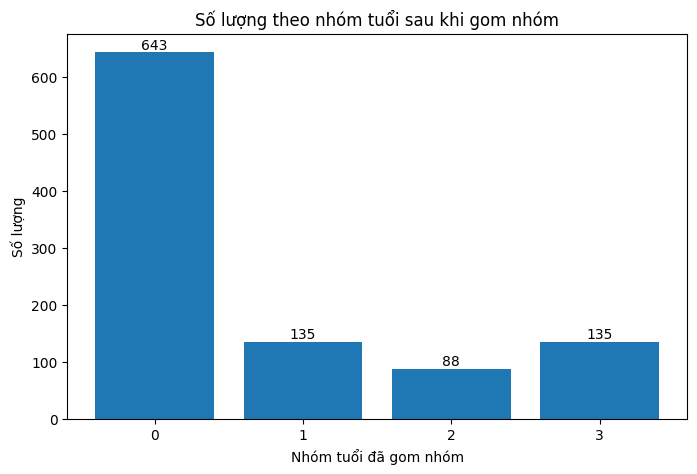

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sắp xếp nhóm theo thứ tự tăng dần
age_group_counts = (
    df_valid['Age_group_reduced']
    .value_counts()
    .sort_index()
)

labels = age_group_counts.index
x_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(x_pos, age_group_counts.values)

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=0)

# Ghi số trên cột
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

ax.set_title('Số lượng theo nhóm tuổi sau khi gom nhóm')
ax.set_xlabel('Nhóm tuổi đã gom nhóm')
ax.set_ylabel('Số lượng')

plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

counts = age_group_counts = (
    subject_reduced['Age_group_reduced']
    .value_counts()
    .sort_index()
)

total = counts.sum()

flatui = ["#3498db", "#e74c3c", "#2ecc71", "#9b59b6",
          "#f1c40f", "#1abc9c", "#e67e22", "#34495e"]

colors = flatui[:len(counts)]   # 🎨 bảng màu đẹp, nhẹ, dễ nhìn

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    counts,
    labels=counts.index,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n(n={int(p*total/100)})',
    startangle=90,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title('Phân bố Số lượng và Tỷ lệ Nhóm tuổi', fontsize=16, fontweight='bold')

plt.axis('equal')
plt.legend(
    wedges, counts.index,
    title="Nhóm tuổi",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# for autotext in autotexts:
#     autotext.set_color('white')
    # autotext.set_weight('bold')

plt.show()


NameError: name 'subject_reduced' is not defined